In [7]:
import matplotlib.pyplot as plt
from typing import Tuple, TextIO
import numpy as np
%matplotlib inline

In [8]:
# Convenience Constant

PROVINCE_CODES = (
        ('10','NL'),
        ('11','PE'),
        ('12','NS'),
        ('13','NB'),
        ('24','QC'),
        ('35','ON'),
        ('46','MB'),
        ('47','SK'),
        ('48','AB'),
        ('59','BC'),
        ('60','NN') # NN is a combined code for NT, NU and YK
    )

# PART 1: PREPARATION

# Change data types to:
# - 'U2' for nominal
# - int for ordinal
# - float for interval
# - float for ratio

DATA_COLUMNS = [
('alcofreq', int),
('alcoweek', float),
('biosex', 'U2'),
('agegroup', float),
('education', int),
('fruitvegtot', float),
('stressgen', int),
('stresswork', int),
('healthphys', int),
('healthment', int),
('satisfaction', int),
('province', 'U2'),
('hasdoctor', 'U2'),
('bmi', float),
('height', float),
('weight', float),
('incomegroup', float),
('workhoursperweek', float),
('firstlanguage', 'U2'),
('yrsmokedaily', float)
]


# Fill out tuples with nominal, ordinal, interval, and ratio column names

NOMINAL = ('biosex',
           'province',
           'hasdoctor',
           'firstlanguage')

ORDINAL = ('education',
           'stressgen',
           'stresswork',
           'healthphys',
           'healthment',
           'satisfaction'
           'alcofreq')

INTERVAL = ('agegroup',
            'incomegroup')

RATIO = ('alcoweek',
         'fruitvegtot',
         'bmi',
         'height',
         'weight',
         'workhoursperweek',
         'yrsmokedaily')





# PART 2: FUNCTIONS

def replace_nominal_codes(data: np.array, column_name: str, codes: Tuple[Tuple[str, str]]) -> None:
    '''Precondition: column_name exists in data and is a nominal data measurement scale.
    codes is a tuple of tuples containing (old code, new code).

    Change all occurrences of old code to new code in column_name of data.
    
    >>> replace_nominal_codes(CCHS, 'biosex', (('1', 'M'),('2', 'F')))
    >>> CCHS['biosex'][0]
    'F'
    >>> CCHS['biosex'][-1]
    'M'
    '''
    values = data[column_name]
    for inner_code in codes:        
        values[values == inner_code[0]] = inner_code[1]
        
        
def replace_missing_with_nan(data: np.array, column_name: str, missing_codes: Tuple[float]) -> None:
    '''Precondition: column_name exists in data and is a ratio data measurement scale.
    missing_codes is a tuple containing codes that denote missing data.
    Convert all values in column column_name of data that match the codes 
    in missing_codes to Not-A-Number values (np.nan)
    
    >>> replace_missing_with_nan(CCHS, 'alcoweek', (996,))
    >>> CCHS['alcoweek'][2]
    nan
    >>> CCHS['alcoweek'][-3]
    nan
    '''
    values = data[column_name]
    for missing_data in missing_codes:
        values[values == missing_data] = np.nan
        
        
        
def write_categorical_csv(data: np.array, column_name: str, outfile: TextIO) -> None:
    '''Precondition: column_name exists in data and is nominal or ordinal data measurement scale.
    Write to outfile the label and counts of each category contained in column_name of data.
    
    >>> with open("csv/biosex.csv", 'w') as file:
            write_categorical_csv(CCHS, 'biosex', file)
    >>> with open("csv/biosex.csv", 'r') as check:
            for line in check:
                print(line.strip())
    biosex,count
    F,832
    M,668
    '''      
    outfile.write(column_name + ',count\n')
    values = data[column_name]
    category_count = np.unique(values, return_counts = True)
    for key, value in np.nditer(category_count):
        outfile.write(str(key) + ',' + str(value) + '\n')
    


def write_column_summary_csv(data: np.array, column_name: str, outfile: TextIO) -> None:
    '''Precondition: column_name exists in data and is a non-nominal data measurement scale.
    Write to outfile a line containing comma-separated values as follows:
    - The column name
    - The median of values in the column
    - (if interval or ratio) The mean of values in the column, ignoring nan
    - (if interval or ratio) The standard deviation of values in the column, ignoring nan
    
    (Examples not required)
    
    '''
    values = data[column_name]
    if column_name in ORDINAL:
        outfile.write(column_name + ',' + str(np.nanmedian(values)) + ',,\n')
    else:
        outfile.write(column_name + ',' + str(np.nanmedian(values)) + ',' + str(np.nanmean(values)) + ',' + str(np.nanstd(values)) +'\n')
        
    '''
    np.nanmean(data, axis=0)
    np.nanmedian(data)
    np.nan
    '''
    pass


if __name__ == "__main__":
    
    # Uncomment when Part 1 is complete
    
    CCHS = np.genfromtxt('CCHSX.csv', delimiter=',', skip_header=1, dtype=DATA_COLUMNS)
    
    
    # Uncomment when replace_nominal_codes is complete
    
    replace_nominal_codes(CCHS, 'biosex', (('1','M'),('2','F')))
    replace_nominal_codes(CCHS, 'province', PROVINCE_CODES)
    replace_nominal_codes(CCHS, 'hasdoctor', (('1','Y'),('2','N')))
    replace_nominal_codes(CCHS, 'firstlanguage', (('1','EN'),('2','FR'),('3','EF'),('4','NO')))


    # Uncomment when replace_missing_with_nan is complete
    
    replace_missing_with_nan(CCHS, 'alcoweek', (996,))
    replace_missing_with_nan(CCHS, 'workhoursperweek', (996,))
    
    
    # Uncomment when write_categorical_csv is complete
    
    for c in NOMINAL + ORDINAL:
        with open("csv/"+c+'.csv', 'w') as f:
            write_categorical_csv(CCHS, c, f)
    
    
    # Uncomment when write_column_summary_csv is complete
    
    with open("csv/summary.csv", 'w') as f:
        f.write("COLUMN,MEDIAN,MEAN,STDEV\n")
        for n in ORDINAL + INTERVAL + RATIO:
            write_column_summary_csv(CCHS, n, f)
        
    

ValueError: no field of name satisfactionalcofreq

# Data Exploration Section

The following section will display graphical information regarding the three variables:  
    
    stressgen - amount of stress in one's life ranging from 1 - 5, 5 being extremely stressed
    healthphy - one's perceived health status ranging from 0 - 4, 4 being excellent 
    biosex - a person's sex, M for Male and F for Female

The following statistics were taken from a sample of the Canadian Community Health Survey or CCHS provided Statistics Canada.

Here the question to be asked is: are levels of stress and physical health status higher or lower for males compared to females?

To analyze this question, there will be scatterplots taken to compare the levels of stress generated and health status for both males and females.  

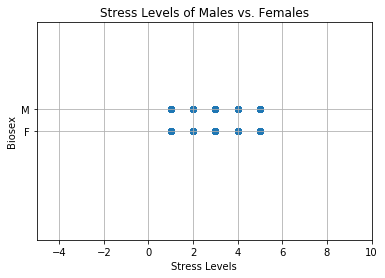

In [48]:
plt.scatter(CCHS['stressgen'], CCHS['biosex'])
plt.title('Stress Levels of Males vs. Females')
plt.ylabel('Biosex')
plt.xlabel('Stress Levels')
plt.axis([-1, 10, -5, 5])
plt.grid(True)
plt.show()

From the plot it can be seen the stress levels and health status levels are similar between males and females.  A plot was created for both males and females and compared the stress levels as well as the health status levels with the same limits on both the x-axis and y-axis.  On the y-axis males are shown as M and Females are shown as F, as the scatter plot moves further down the x-axis the stress levels of males and females are relatively similar with some variations in the 3rd points from the x-axis.  It can be seen from here that the stress levels between males and females are relatively similar.   

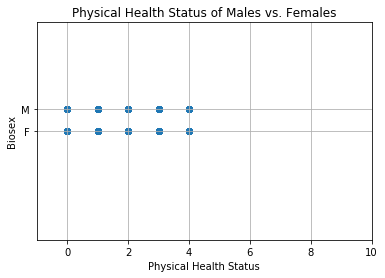

In [6]:
plt.scatter(CCHS['healthphys'], CCHS['biosex'])
plt.title('Physical Health Status of Males vs. Females')
plt.ylabel('Biosex')
plt.xlabel('Physical Health Status')
plt.axis([-1, 10, -5, 5])
plt.grid(True)
plt.show()

The physical health status displays similar results as their was little deviation between the health status of males and females.  Here the plot shows little to no deviation in the physical health status points of males against females and provides some insight as to their correlation.   

Overall in can be seen from the scatterplots that little deviation exists between the physical health status and stress levels between males and females that participated in this survey.  This may be due to similar lifestyles and backgrounds between the individuals.  In order to gain more information regarding this area, a deeper analysis must be conducted regarding the day-to-day lives of the individuals studied.